In [71]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.optimize import curve_fit
from scipy.stats import poisson

In [72]:
Q0 =fits.open('GRB210730A_1_clean_Q0.lc')
Q1 =fits.open('GRB210730A_1_clean_Q1.lc')
Q2 =fits.open('GRB210730A_1_clean_Q2.lc')
Q3 =fits.open('GRB210730A_1_clean_Q3.lc')

Trigger Time = 365317050.0

In [73]:
Q0_time = Q0[1].data['TIME'][5770:6000]
Q0_rate = Q0[1].data['RATE'][5770:6000]

Q1_time = Q1[1].data['TIME'][5770:6000]
Q1_rate = Q1[1].data['RATE'][5770:6000]

Q2_time = Q2[1].data['TIME'][5770:6000]
Q2_rate = Q2[1].data['RATE'][5770:6000]

Q3_time = Q3[1].data['TIME'][5770:6000]
Q3_rate = Q3[1].data['RATE'][5770:6000]


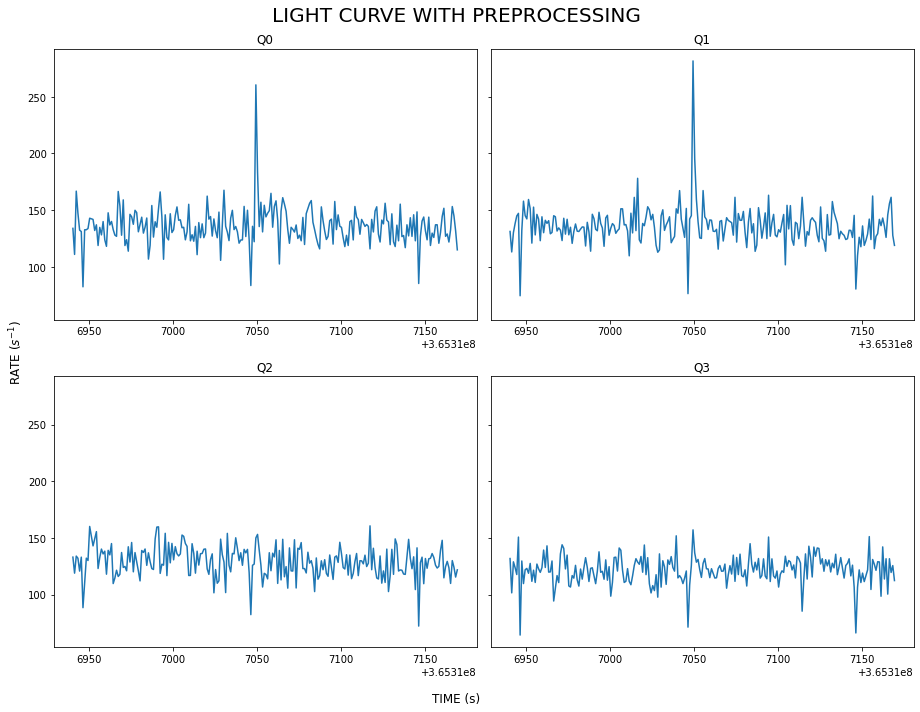

In [74]:
figure, axis = plt.subplots(2, 2, figsize=(13, 10), sharey=True)

figure.suptitle('LIGHT CURVE WITH PREPROCESSING',fontsize=20)
axis[0, 0].plot(Q0_time , Q0_rate)
axis[0, 0].set_title("Q0")

axis[0, 1].plot(Q1_time , Q1_rate)
axis[0, 1].set_title("Q1")

axis[1, 0].plot(Q2_time , Q2_rate)
axis[1, 0].set_title("Q2")

axis[1, 1].plot(Q3_time , Q3_rate)
axis[1, 1].set_title("Q3")

figure.supxlabel('TIME (s)')
figure.supylabel('RATE ($s^{-1}$)')
plt.tight_layout()

In [75]:
# def conv(Q0_rate,to_bins):    
#     ra = to_bins
#     Q0_rate_ra = []
#     for i in range(0,len(Q0_rate),ra):
#         count = sum(Q0_rate[i:i+ra])
#         #print(count)
#         Q0_rate_ra.append(count)
#         count=0
#     return Q0_rate_ra

# def conv_t(Q0_rate,to_bins):
#     ra = to_bins
#     Q0_rate_ra = []
#     for i in range(0,len(Q0_rate),ra):
#         count = Q0_rate[i]
#         #print(count)
#         Q0_rate_ra.append(count)
#         count=0
#     return Q0_rate_ra


# def conv_bin_size(Q0_r,Q0_t,Q1_r,Q1_t,Q2_r,Q2_t,Q3_r,Q3_t,to_bins):
#     return [conv(Q0_r,to_bins),conv_t(Q0_t,to_bins),conv(Q1_r,to_bins),conv_t(Q1_t,to_bins),
#             conv(Q2_r,to_bins),conv_t(Q2_t,to_bins),conv(Q3_r,to_bins),conv_t(Q3_t,to_bins)]

# [Q0_rate_ed,Q0_time_ed,Q1_rate_ed,Q1_time_ed,
# Q2_rate_ed,Q2_time_ed,Q3_rate_ed,Q3_time_ed] = conv_bin_size(Q0_rate,Q0_time,Q1_rate,Q1_time,
#                                                             Q2_rate,Q2_time,Q3_rate,Q3_time,5)

# [Q0_rate,Q0_time,Q1_rate,Q1_time,
#  Q2_rate,Q2_time,Q3_rate,Q3_time] = [Q0_rate_ed,Q0_time_ed,Q1_rate_ed,Q1_time_ed,
#                                      Q2_rate_ed,Q2_time_ed,Q3_rate_ed,Q3_time_ed]

# Q0_time = Q0_time
# Q0_rate = Q0_rate

# Q1_time = Q1_time
# Q1_rate = Q1_rate

# Q2_time = Q2_time
# Q2_rate = Q2_rate

# Q3_time = Q3_time
# Q3_rate = Q3_rate

In [76]:
# figure, axis = plt.subplots(2, 2, figsize=(13, 10), sharey=True)

# figure.suptitle('LIGHT CURVE WITH PREPROCESSING',fontsize=20)
# axis[0, 0].plot(Q0_time , Q0_rate)
# axis[0, 0].set_title("Q0")

# axis[0, 1].plot(Q1_time , Q1_rate)
# axis[0, 1].set_title("Q1")

# axis[1, 0].plot(Q2_time , Q2_rate)
# axis[1, 0].set_title("Q2")

# axis[1, 1].plot(Q3_time , Q3_rate)
# axis[1, 1].set_title("Q3")

# figure.supxlabel('TIME (s)')
# figure.supylabel('RATE ($s^{-1}$)')
# plt.tight_layout()

### Plot Funciton

In [77]:
def plot_curve(Q0_time,Q0_rate,Q0_trend,Q0_detrend_data,Q1_time,Q1_rate,Q1_trend,Q1_detrend_data,
           Q2_time,Q2_rate,Q2_trend,Q2_detrend_data,Q3_time,Q3_rate,Q3_trend,Q3_detrend_data):
    figure, axis = plt.subplots(4, 2, figsize=(15, 15))
    figure.suptitle('DETRENDING WITH',fontsize=20)
    axis[0, 0].plot(Q0_time, Q0_rate, label = 'Light Curve')
    axis[0, 0].plot(Q0_time, Q0_trend, label = 'Trend')
    axis[0, 0].legend(loc='best')
    axis[0, 0].set_title("Q0")
    axis[0, 1].plot(Q0_time, Q0_detrend_data, label = 'Detrended Curve')
    axis[0, 1].legend(loc='best')
    axis[0, 1].set_title("Q0_detrended")

    axis[1, 0].plot(Q1_time, Q1_rate, label = 'Light Curve')
    axis[1, 0].plot(Q1_time, Q1_trend, label = 'Trend')
    axis[1, 0].legend(loc='best')
    axis[1, 0].set_title("Q1")
    axis[1, 1].plot(Q1_time, Q1_detrend_data, label = 'Detrended Curve')
    axis[1, 1].legend(loc='best')
    axis[1, 1].set_title("Q1_detrended")

    axis[2, 0].plot(Q2_time, Q2_rate, label = 'Light Curve')
    axis[2, 0].plot(Q2_time, Q2_trend, label = 'Trend')
    axis[2, 0].legend(loc='best')
    axis[2, 0].set_title("Q2")
    axis[2, 1].plot(Q2_time, Q2_detrend_data, label = 'Detrended Curve')
    axis[2, 1].legend(loc='best')
    axis[2, 1].set_title("Q2_detrended")

    axis[3, 0].plot(Q3_time, Q3_rate, label = 'Light Curve')
    axis[3, 0].plot(Q3_time, Q3_trend, label = 'Trend')
    axis[3, 0].legend(loc='best')
    axis[3, 0].set_title("Q3")
    axis[3, 1].plot(Q3_time, Q3_detrend_data, label = 'Detrended Curve')
    axis[3, 1].legend(loc='best')
    axis[3, 1].set_title("Q3_detrended")
    plt.savefig("Detrend curve with SAVGOL filter.jpg")
    plt.tight_layout()

### Noise extraction Fucntions

In [78]:
def get_noise_with_mean(rate):
    #SA_w_start, SA_w_end = get_SA_start_end(rate)
    rate_max_ind = 5879-5770
    #print(len(rate))
    GRB_start, GRB_end = rate_max_ind-15, rate_max_ind+15
    noise = np.concatenate([rate[:GRB_start], rate[GRB_end:]])
    #print(len(noise))
    noise_mean= np.mean(noise)
    noise = np.concatenate([rate[:GRB_start], [noise_mean]*(GRB_end-GRB_start),
                              rate[GRB_end:]])
    #print(len(noise))
    return noise

def get_noise(rate0,rate):
    #SA_w_start, SA_w_end = get_SA_start_end(rate0)
    rate_max_ind = 5879-5770
    GRB_start, GRB_end = rate_max_ind-15, rate_max_ind+15
    noise = np.concatenate([rate[:GRB_start], rate[GRB_end:]])
    return noise

### SA Window extraction

In [79]:
def get_SA_start_end(li):
    max_count = 0
    count = 0
    ind=0
    for i in range(len(li)):
        if li[i] == 0:
            count += 1
        else:
            if max_count<count:
                max_count = count
                ind=i
            count = 0
            
    return ind-max_count,ind

### Savgol Filter

In [80]:
def savgol_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,plot):
    print('SAVGOL FILTER')
    window_length = 100
    polyorder=5

    Q0_noise = get_noise_with_mean(Q0_rate)
    Q0_trend = signal.savgol_filter(Q0_noise , window_length, polyorder)
    Q0_detrend_data = Q0_rate-Q0_trend

    Q1_noise = get_noise_with_mean(Q1_rate)
    Q1_trend = signal.savgol_filter(Q1_noise , window_length, polyorder)
    Q1_detrend_data = Q1_rate-Q1_trend

    Q2_noise = get_noise_with_mean(Q2_rate)
    Q2_trend = signal.savgol_filter(Q2_noise , window_length, polyorder)
    Q2_detrend_data = Q2_rate-Q2_trend

    Q3_noise = get_noise_with_mean(Q3_rate)
    Q3_trend = signal.savgol_filter(Q3_noise , window_length, polyorder)
    Q3_detrend_data = Q3_rate-Q3_trend
    
    if plot=='YES':
        plot_curve(Q0_time,Q0_rate,Q0_trend,Q0_detrend_data,Q1_time,Q1_rate,Q1_trend,Q1_detrend_data,
               Q2_time,Q2_rate,Q2_trend,Q2_detrend_data,Q3_time,Q3_rate,Q3_trend,Q3_detrend_data)

    return Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data

### SNR (S-B)/std function

In [81]:
def SNR_SBstd(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data):    
    window=15
    print('(S-B)/std SNR')
    Q0_rate_max_ind = np.argmax(Q0_detrend_data)
    Q0_noise = np.concatenate((Q0_detrend_data[:Q0_rate_max_ind-window],Q0_detrend_data[Q0_rate_max_ind+window:]))
    Q0_mean , Q0_std = np.mean(Q0_noise) , np.std(Q0_noise)
    Q0_SNR = (max(Q0_detrend_data)-Q0_mean)/Q0_std
    print('Q0 SNR = ',Q0_SNR)

    Q1_rate_max_ind = np.argmax(Q1_detrend_data)
    Q1_noise = np.concatenate((Q1_detrend_data[:Q1_rate_max_ind-window],Q1_detrend_data[Q1_rate_max_ind+window:]))
    Q1_mean , Q1_std = np.mean(Q1_noise) , np.std(Q1_noise)
    Q1_SNR = (max(Q1_detrend_data)-Q1_mean)/Q1_std
    print('Q1 SNR = ',Q1_SNR)

    Q2_rate_max_ind = np.argmax(Q2_detrend_data)
    Q2_noise = np.concatenate((Q2_detrend_data[:Q2_rate_max_ind-window],Q2_detrend_data[Q2_rate_max_ind+window:]))
    Q2_mean , Q2_std = np.mean(Q2_noise) , np.std(Q2_noise)
    Q2_SNR = (max(Q2_detrend_data)-Q2_mean)/Q2_std
    print('Q2 SNR = ',Q2_SNR)

    Q3_rate_max_ind = np.argmax(Q3_detrend_data)
    Q3_noise = np.concatenate((Q3_detrend_data[:Q3_rate_max_ind-window],Q3_detrend_data[Q3_rate_max_ind+window:]))
    Q3_mean , Q3_std = np.mean(Q3_noise) , np.std(Q3_noise)
    Q3_SNR = (max(Q3_detrend_data)-Q3_mean)/Q3_std
    print('Q3 SNR = ',Q3_SNR)

### Gausian SNR

In [82]:
def gauss_func(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

def Gausian_SNR(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data):   
    
    print('GAUSSIAN SNR')
    Q0_noise = get_noise(Q0_rate,Q0_detrend_data)
    n, bins = np.histogram(Q0_noise, bins=80)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    popt, pcov = curve_fit(gauss_func,bin_centers,n)
    print('Q0 SNR = ',abs((max(Q0_detrend_data))/(popt[1]+3*popt[2])))
    
    Q1_noise = get_noise(Q1_rate,Q1_detrend_data)
    n, bins = np.histogram(Q1_noise, bins=80)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    popt, pcov = curve_fit(gauss_func,bin_centers,n)
    print('Q1 SNR = ',abs((max(Q1_detrend_data))/(popt[1]+3*popt[2])))
    
    Q2_noise = get_noise(Q2_rate,Q2_detrend_data)
    n, bins = np.histogram(Q2_noise, bins=80)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    popt, pcov = curve_fit(gauss_func,bin_centers,n)
    print('Q2 SNR = ',abs((max(Q2_detrend_data))/(popt[1]+3*popt[2])))
    
    Q3_noise = get_noise(Q3_rate,Q3_detrend_data)
    n, bins = np.histogram(Q3_noise, bins=80)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    popt, pcov = curve_fit(gauss_func,bin_centers,n)
    print('Q3 SNR = ',abs((max(Q3_detrend_data))/(popt[1]+3*popt[2])))

### Poisson SNR

In [83]:
def poisson_func(x, x0):
    return poisson.pmf(x,x0)

def Poisson_SNR(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data):   
    
    print('Poisson SNR')
    Q0_noise = get_noise(Q0_rate,Q0_detrend_data)
    Q0_noise_off = Q0_noise+160
    n, bins = np.histogram(Q0_noise_off, bins=10,density=True)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    popt, pcov = curve_fit(poisson_func,bin_centers,n,p0=[np.mean(Q0_noise_off)])
    xplot = np.arange(0,175)
    h=np.std(poisson_func(xplot,popt[0]))
    print('Q0 SNR = ',((max(Q0_detrend_data))/(popt[0]+3*h)))
    
    Q1_noise = get_noise(Q1_rate,Q1_detrend_data)
    Q1_noise_off = Q1_noise+160
    n, bins = np.histogram(Q1_noise_off, bins=10,density=True)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    popt, pcov = curve_fit(poisson_func,bin_centers,n,p0=[np.mean(Q1_noise_off)])
    xplot = np.arange(0,175)
    h=np.std(poisson_func(xplot,popt[0]))
    print('Q1 SNR = ',((max(Q1_detrend_data))/(popt[0]+3*h)))
    
    Q2_noise = get_noise(Q2_rate,Q2_detrend_data)
    Q2_noise_off = Q2_noise+160
    n, bins = np.histogram(Q2_noise_off, bins=10,density=True)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    popt, pcov = curve_fit(poisson_func,bin_centers,n,p0=[np.mean(Q2_noise_off)])
    xplot = np.arange(0,175)
    h=np.std(poisson_func(xplot,popt[0]))
    print('Q2 SNR = ',((max(Q2_detrend_data))/(popt[0]+3*h)))
    
    Q3_noise = get_noise(Q3_rate,Q3_detrend_data)
    Q3_noise_off = Q3_noise+160
    n, bins = np.histogram(Q3_noise_off, bins=10,density=True)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    xplot = np.arange(0,175)
    h=np.std(poisson_func(xplot,popt[0]))
    print('Q3 SNR = ',((max(Q3_detrend_data))/(popt[0]+3*h)))

SAVGOL FILTER
(S-B)/std SNR
Q0 SNR =  9.344337
Q1 SNR =  11.434442
Q2 SNR =  2.5267277
Q3 SNR =  3.002279
GAUSSIAN SNR
Q0 SNR =  3.249590360001291
Q1 SNR =  4.437751945016159
Q2 SNR =  0.9041678539180338
Q3 SNR =  1.1446362746992012
Poisson SNR
Q0 SNR =  0.7726287488716712
Q1 SNR =  0.922488282094864
Q2 SNR =  0.21312366820337425
Q3 SNR =  0.23040788468405993


/home/rahul/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


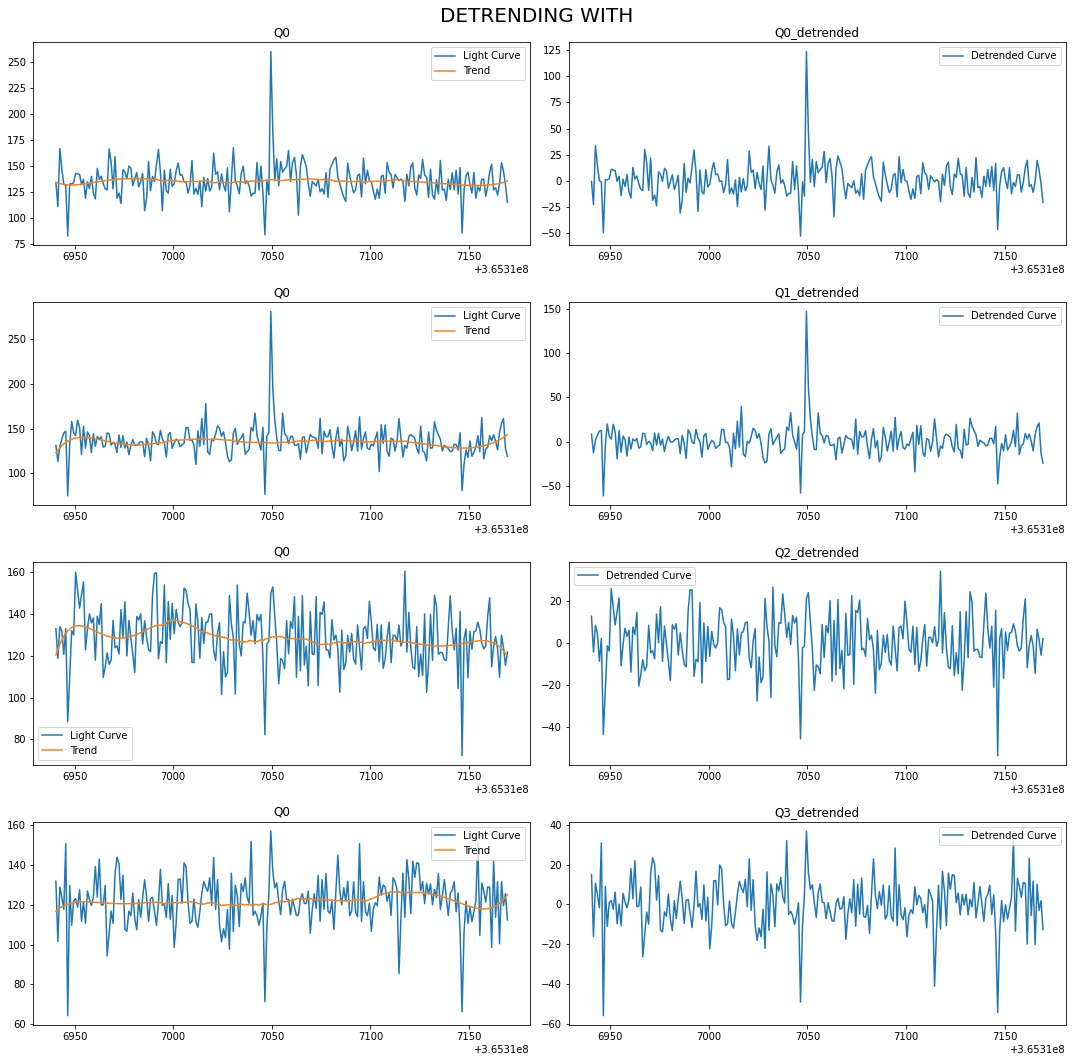

In [84]:
Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data = savgol_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,'YES')
SNR_SBstd(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data)
Gausian_SNR(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data)
Poisson_SNR(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data)

160.12808227539062


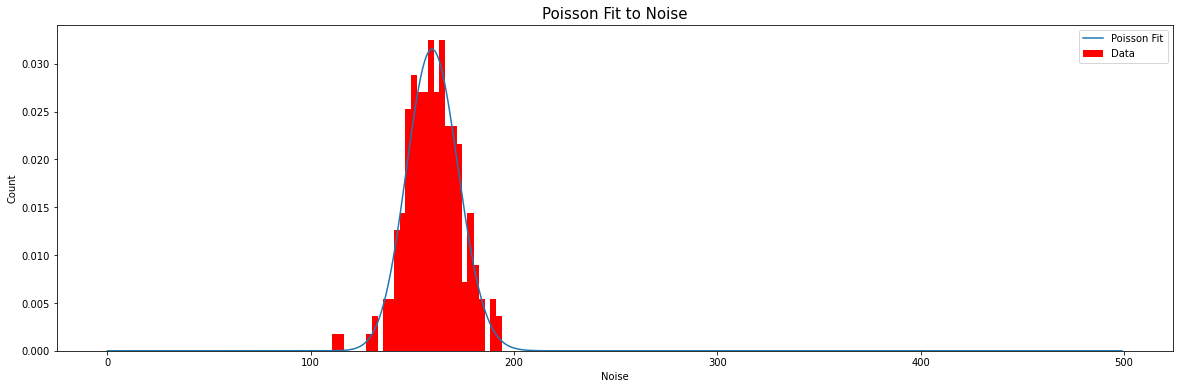

In [85]:
def poisson_func(x, x0):
    return poisson.pmf(x,x0)

Q0_noise = get_noise(Q0_rate, Q0_detrend_data)
Q0_noise_off = Q0_noise+160
n, bins = np.histogram(Q0_noise_off, bins=30,density=True)
bin_centers = 0.5 * (bins[1:] + bins[:-1])
popt, pcov = curve_fit(poisson_func,bin_centers,n,p0=[np.mean(Q0_noise_off)])
print(popt[0])
xplot = np.arange(0,500)
plt.figure(figsize=(20,6))
plt.title('Poisson Fit to Noise',fontsize=15)
plt.bar(bin_centers,n,label='Data',color='r',width=3)
plt.plot(xplot,poisson_func(xplot,popt[0]),label='Poisson Fit')
plt.xlabel('Noise')
plt.ylabel('Count')
plt.legend(loc='best')
plt.savefig('Poisson Fit')

SAVGOL FILTER


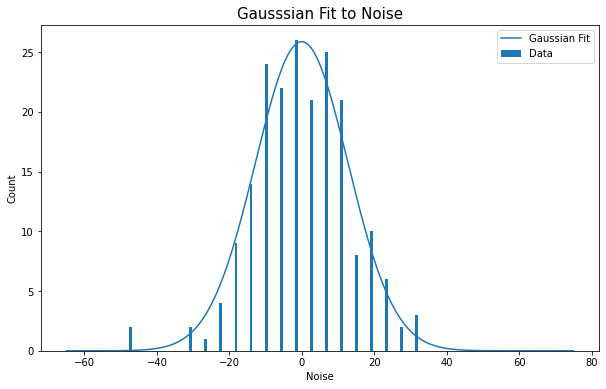

In [86]:
def gauss_func(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data = savgol_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,'N')
Q0_noise = get_noise(Q0_rate,Q0_detrend_data)
n, bins = np.histogram(Q0_noise, bins=20)
bin_centers = 0.5 * (bins[1:] + bins[:-1])
popt, pcov = curve_fit(gauss_func,bin_centers,n)
xplot = np.linspace(-65,75,200)
plt.figure(figsize=(10,6))
plt.title('Gausssian Fit to Noise',fontsize=15)
plt.bar(bin_centers,n,label='Data')
plt.plot(xplot,gauss_func(xplot,popt[0],popt[1],popt[2]),label='Gaussian Fit')
plt.xlabel('Noise')
plt.ylabel('Count')
plt.legend(loc='best')
plt.savefig('Gausssian Fit.jpeg')